<a href="https://colab.research.google.com/github/richdied/Python_Statistics/blob/main/008_1_Residual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. testData.csv에 적용

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* pandas & matplotlib Packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* Read testData.csv

In [ ]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'

DATA = pd.read_csv(url)

* testData.csv Information

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [ ]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


* testData.csv Visualization
 - Distribution

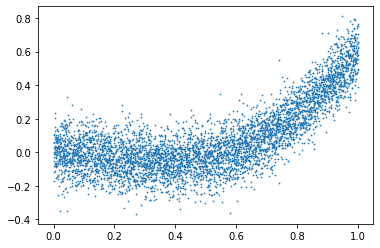

In [ ]:
plt.scatter(DATA.inputs, DATA.outputs, s = 0.5)
plt.show()

> ## 1) Modeling

In [ ]:
import statsmodels.formula.api as smf

Model_lm = smf.ols(formula = 'outputs ~ inputs',
                   data = DATA).fit()

# II. 모델의 선형성

> ## 1) 예측값(fitted) 계산

In [ ]:
fitted = Model_lm.predict(DATA.inputs)

> ## 2) 잔차(residual) 계산

* 실제값과 예측값의 차이

In [ ]:
residual = DATA.outputs - fitted

> ## 3) 예측값과 잔차 비교

* 모든 예측값에서 잔차가 비슷하게 있어야 함
* 잔차의 추세 : 빨간실선
* 빨간실선이 회색점선을 크게 벗어난다면 예측값에 따라 잔차가 크게 달라지는 것을 의미

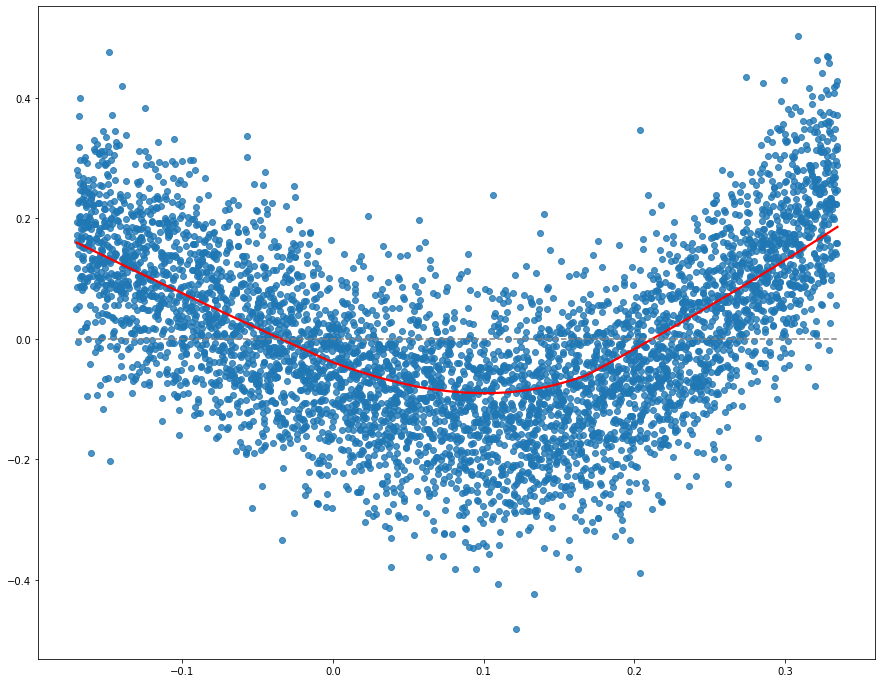

In [ ]:
plt.figure(figsize = (15, 12))
sns.regplot(fitted, residual, 
            lowess = True, 
            line_kws = {'color':'red'})
plt.plot([fitted.min(), fitted.max()], 
         [0, 0], '--', color = 'gray')
plt.show()

# III. 잔차분석

> ## 1) 잔차의 정규성

* 잔차가 정규분포를 따른다는 가정 검증

In [ ]:
import scipy.stats

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

* Q-Q 플롯
 * 잔차가 정규분포를 띄면 Q-Q 플롯에서 점들이 점선을 따라 배치

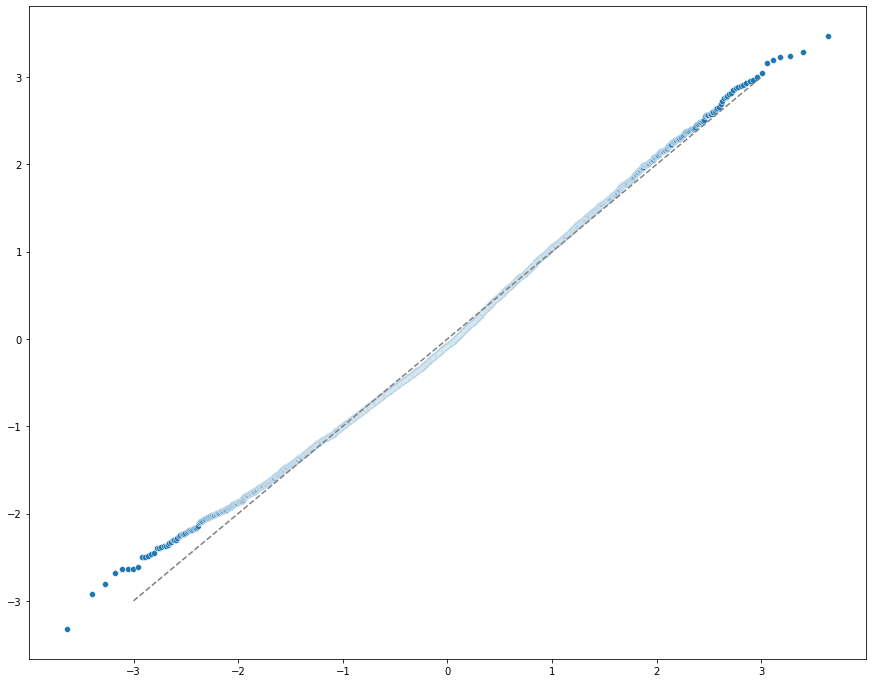

In [ ]:
plt.figure(figsize = (15, 12))
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color = 'grey')
plt.show()

* shapiro Test
 * p값이 0.05보다 작아 "잔차의 정규성을 따른다"는 귀무가설을 기각
 * 유의수준 5%에서 잔차의 정규성 위반

In [ ]:
scipy.stats.shapiro(residual)[1]

3.1104258058078926e-11

* Residual Visualization

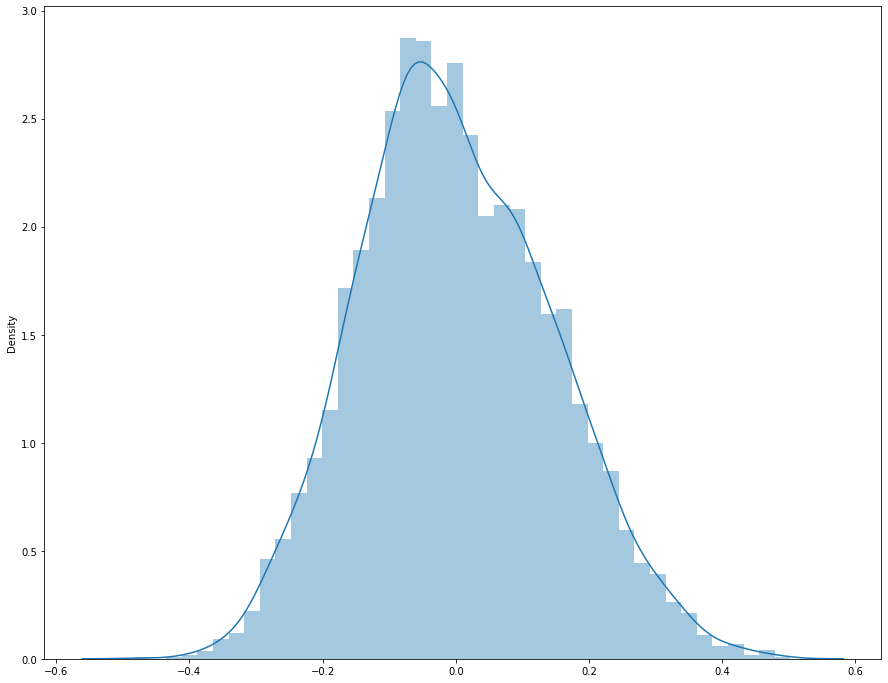

In [ ]:
plt.figure(figsize = (15, 12))
sns.distplot(residual)
plt.show()

> ## 2) 잔차의 등분산성

* 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
 * 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 시각화
 * 빨간실선이 수평선을 그리는 것이 이상적

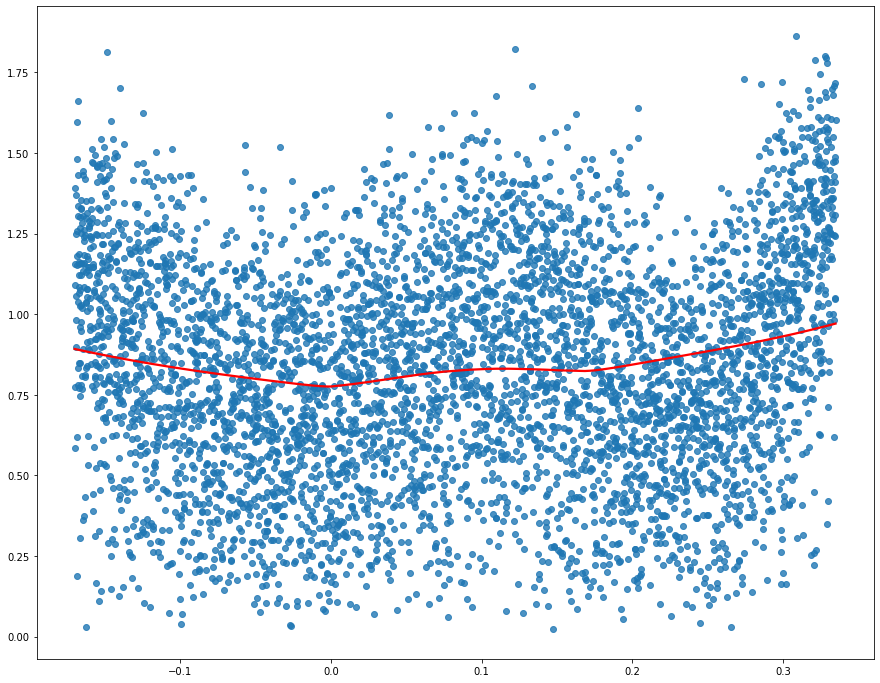

In [ ]:
import numpy as np

plt.figure(figsize = (15, 12))
sns.regplot(fitted, 
            np.sqrt(np.abs(sr)), 
            lowess = True, 
            line_kws = {'color': 'red'})
plt.show()

> ## 3) 잔차의 독립성

* 회귀분석에서 잔차는 정규성, 등분산성 그리고 독립성을 가지는 것으로 가정
* 자료 수집 시 Random Sampling을 하였다면, 잔차의 독립성은 만족하는 것으로 봄

# 
# 
# 
# The End
# 
# 
# 